# Proyecto Bike-Share Navigate: 
## Google Data Analytics CapStone
Autor: **Gregorio Paz**  
E-Mail: **gregorio.paz@ gmail.com**  
[**Linkedin:** https://www.linkedin.com/in/gregoriopaz/](https://www.linkedin.com/in/gregoriopaz/)  

Fecha: Marzo-2023  
Proyecto para certificación de Google Data Analysis  

Este trabajo sigue el framework de Google Data Analytics: 
**ASK/PREPARE/PROCESS/ANALYZE/SHARE/ACT**  

Para toda la manipulación de datos se utilizó **PYTHON**.  
Desarrollo de cuadernos/notebook en **Jupyter/Markdown.**  
Se realizó una sección en de análisis en **Excell.**  
Además, se realizó procesamiento y análisis de data en **Google BigQuery.**  



### Este trabajo se encuentra dividido de la siguiente forma:
#### Parte 1: [Introducción](#introduccion-section)
* Presentación de caso a resolver  

#### Parte 2: [Preparación](#preparar-section)
* Preparación de la Data
* Procesamiento de la Data  

#### Parte 3: [MS EXCELL](#excell-section)
* Aplicación de filtros y limpieza 
* Creación de Pivot Tables y estadísticos descriptivos  

#### Parte 4: [Procesamiento](#procesar-section)
* Limpieza, filtros y agregación data para el análisis  

#### Parte 5: [Análisis](#analizar-section)
* Análisis Descriptivo  
* Principales insights  

#### Parte 6: [Visualizaciones (Share)](#visualizar-section)
* Gráficos: Vijes promedios por día, por tipo de usuario, cantidad de viajes por día y usuario.  





<a id='introduccion-section'></a>
==================================
## PARTE 1: Introducción
==================================


### Cyclistic bike-share. 

Cyclistic es un programa de bicicletas compartidad de la ciudad de Chicago. [Ir a Divvy Bikes](https://divvybikes.com/).  


El director de marketing cree que el éxito de la compañia depende de maximizar el número de membresías anuales. Además, se desea entender como los usuarios ciclistas "casuales" y "miembros" usan Cyclistic diferentemente.   
A partir de estos insights, se pretende diseñar una estrategia de marketing para convertir usuarios "casual" a "annual members".  
Antes de cualquier cosa, el equipo de Cyclistic executives debe aprobar las recomendaciones, las cuales deben ser respaldadas por "insights" convincentes, apoyados por la data y visualizaciones -gráficos.  
Existe la hipótesis (por parte del director de marketing) que los usuarios 'Casual' son concientes del programa de membresía.  



### Stakeholders:  

* **The director of marketing/Manager:** Responsable del desarrollo de campañas de marketing para promover el uso de bicicletas compartidas.  


* **Cyclistic marketing team:** Responsables de reunir, analizar, reportar data para guiar las estrategias de marketing.  

* **Cyclistic executive time:** Quien decide si se aprueba o no las recomendaciones del programa de marketing.  

### A resolver:  
* ¿Cómo 'Anual Members' y 'Casual' usuarios usan el programa Cyclistic?  
* ¿Por qué usuarios 'Casual' comprarían la membresía anual?  
* ¿Cómo puede Ciclistic usar medios digitales para convertir usuarios 'Casual' a 'Annual Members'  

Se aplicará el proceso de data análisis: ASK, PREPARE, PROCESS, ANALYSE, SHARE, ACT. Correspondiente al framework de Google Data Analytics.

<a id='preparar-section'></a>
==================================
## PARTE 2: Preparación de la data
==================================

**Ubicación de la data:**  
Fuente de origen: [Divvy Bike - AWS ](https://divvy-tripdata.s3.amazonaws.com/index.html).

**Credibilidad, Confiabilidad y Seguridad de la data:**  
Lyft Bikes and Scooters, LLC (“Bikeshare”) opera en la ciudad de Chicago ("City") Divvy, servicio de bicicletas compatidas.
Acuerdo de licencia: [Revisar aquí](https://ride.divvybikes.com/data-license-agreement)

La data está almacenada en archivos de CSV, por mes. En los años anteriores también se puede encontrar por trimestres.
Archivos se encuentran almacenada en servidores AWS.  

**Archivos a utilizar:**  
* Se trabajará el año 2022, donde se consideran 12 archivos (CSV), separados por ",". 
* Cada archivo tiene 13 columnas correspodientes a los atributos de la data.  
* Total tamaños los 12 archivos: **1,08 GB**. 



### Listado de archivos CSV a procesar:
Los archivos fueron desscargados y fueron almacenados en equipo local.
En el directorio actual de trabajo hay un subdirectorio /CSV, donde se encuentran.  
Se realizó copia de seguridad de los archivos (backup) en formato Zip, en otra carpeta.


In [1]:
import pandas as pd
import os

#work_path = '/Users/goyo/workspace/DataScience/Google/8_Proyecto/CSV'
current_dir = os.getcwd()
dir_path = current_dir + '/CSV'

files = []
# Lectura del directorio '/CSV'
# Se agregan a la lista solos los archivos csv
for path in os.listdir(dir_path):
    # verificación que sea archivo
    if os.path.isfile(os.path.join(dir_path, path)):
        if path.find("csv") != -1:
            files.append(path)

files.sort()

#lista de archivos
print("Lista de archivos: ")
files


Lista de archivos: 


['202201-divvy-tripdata.csv',
 '202202-divvy-tripdata.csv',
 '202203-divvy-tripdata.csv',
 '202204-divvy-tripdata.csv',
 '202205-divvy-tripdata.csv',
 '202206-divvy-tripdata.csv',
 '202207-divvy-tripdata.csv',
 '202208-divvy-tripdata.csv',
 '202209-divvy-tripdata.csv',
 '202210-divvy-tripdata.csv',
 '202211-divvy-tripdata.csv',
 '202212-divvy-tripdata.csv']

### Revisión de consistencia de cabecera de los 12 archivos
Se verifica que todos tengan los mismos nombre de columnas

In [2]:
#Inspección visual de nombres de las columnas
cabeceras = []
print("Cabeceras:")

for file in files:
    df = pd.read_csv(dir_path +"/" + file)
    cabeceras.append(df.columns.values)
    print(list(df.columns.values))

Cabeceras:
['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']
['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']
['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']
['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']
['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'membe

### Comprobación misma cantidad de columnas  
Se verifica que los 12 archivos tengan la misma cantidad de columnas

In [3]:
for head in cabeceras:
    print(len(head))


13
13
13
13
13
13
13
13
13
13
13
13


### Consistencia en nombre de columnas (o series)
Se verifica que los 12 archivos tengan los mismos nombres de columnas.  
Se chequea uno por uno.

In [4]:
#Se toma el primer archivo como referencia de nombres de columna para comparar
head_ref= cabeceras[0]

for i in range(len(cabeceras)):
    len_head= len(head)
    consistencia= "Archivo: " + str(i+1) + " OK"

    #comparación de nombres de columnas/series
    for j in range(len(head)):
        if head_ref[j] != head[j]:
            print("Inconsistencia de nombres de columnas encontrada")
            consistencia=  "Problema con el archivo: " + str(i+1)
            #print("\n Problema con el archivo: " + str(i+1))

    print(consistencia)

Archivo: 1 OK
Archivo: 2 OK
Archivo: 3 OK
Archivo: 4 OK
Archivo: 5 OK
Archivo: 6 OK
Archivo: 7 OK
Archivo: 8 OK
Archivo: 9 OK
Archivo: 10 OK
Archivo: 11 OK
Archivo: 12 OK


### Agrupamos por trimestres
Se unen los archivos (merge), para obtener 4 archivos (por trimestres) y luego trabajarlos en excell.


In [5]:
i = 0
# lista de archivos por trimestre
files_q = []
data_bike = ""

for file in files:
    i = i+1
    files_q.append(dir_path + "/" + file)

    # cuando se han leido 4 archivos se genera trimestre: Q1..Q4
    if (i % 3) == 0:
        data_bike = pd.concat( map(pd.read_csv, files_q), ignore_index=True )

        # Número trimestre
        q = i // 3
        # nombre archivo Qx-2022-2022-divvy-tripdata.csv
        file_out = dir_path + "/quarters/Q" + str(q) + "-2022-divvy-tripdata.csv"

        # se guarda en directorio de trabajo actual
        data_bike.to_csv(file_out)
        print("Generado: " + file_out)
        data_bike = ""
        files_q = []


print("Archivos trimestrales generados")


Generado: /Users/goyo/workspace/DataScience/Google/8_Proyecto/CSV/quarters/Q1-2022-divvy-tripdata.csv
Generado: /Users/goyo/workspace/DataScience/Google/8_Proyecto/CSV/quarters/Q2-2022-divvy-tripdata.csv
Generado: /Users/goyo/workspace/DataScience/Google/8_Proyecto/CSV/quarters/Q3-2022-divvy-tripdata.csv
Generado: /Users/goyo/workspace/DataScience/Google/8_Proyecto/CSV/quarters/Q4-2022-divvy-tripdata.csv
Archivos trimestrales generados


<a id='excell-section'></a>
==================================
### PARTE 3: MS EXCELL
==================================  

**Excell:** para abrir csv, inspencionar de forma rápida y visual la data. También se utilizará para el desarrollo del proyecto según lo indicado: limpieza, creación de filtros, Pivot Tables, funciones de agregamiento, entre otras.  


### Cálculo ride_lenght (largo viaje) y week_day 

Usando los archivos por trimestre: Q1, Q2, Q3, Q4.  
Se creó nueva columna y se calculó largo de ride y día de la semana.
Se creó *tabla dinámica* (pivot table) para calcular datos agregados de:  
* Tipo de bicicleta: cantidad de viajes por cada día de la semana, % que representan
* Tipo usuarios: membresía anual, usuario casual, cantidad de viajes.
Tiempos de viaje: promedio, máximo de cada uno.


<a id='procesar-section'></a>
====================================
## PARTE 4: Procesamiento
====================================  
Siguiendo las instrucciones proporcionadas por el curso (originalmente las operaciones en R).

Limpieza y agregación de la data para preparar el Análisis.

### Hacemos Merge para obtener archivo anual
Se une Q1, Q2, Q3, Q4

In [6]:
import pandas as pd
import os
current_dir = os.getcwd()
file01 = current_dir + '/csv/quarters/Q1-2022-divvy-tripdata.csv'
file02 = current_dir + '/csv/quarters/Q2-2022-divvy-tripdata.csv'
file03 = current_dir + '/csv/quarters/Q3-2022-divvy-tripdata.csv'
file04 = current_dir + '/csv/quarters/Q4-2022-divvy-tripdata.csv'

files_q = [file01, file02, file03, file04]

# dataframe año completo
dfy = pd.concat( map(pd.read_csv, files_q), ignore_index=True )

# nombre de las columnas
print(list(dfy.columns.values))

['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']


In [7]:
# Cantidad de registros
print(len(dfy.index))

5667717


In [8]:
# head
dfy.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [9]:
# Se elimina primera colunma (Unnamed 0), indice creado por pandas
del dfy['Unnamed: 0']
dfy.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.01256,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.01256,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.92533,-87.665800,member


### Información sobre el dataframe  

* Tamaño, cantidad de filas, columnas, dimensiones.  
* Estructura, tipos de datos de sus series/columnas.  


In [10]:
# dataframe.size (cantidad de elementos totales en la data)
dfy.size

73680321

In [11]:
# dataframe.shape (cantidad de filas, columnas)
dfy.shape

(5667717, 13)

In [12]:
# dataframe.ndim Dimensiones
dfy.ndim

2

In [13]:
# Información sobre la estructura del dataframe

# Lista de nombre de columnas, sus tipos de datos, cantidad de registros, memoria usada
dfy.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [14]:
# tipos de Membresía
dfy['member_casual'].unique().tolist()

['casual', 'member']

### Se crean nuevas columnas para: 
* Mes, día, año (3 columnas) 
* Día de la semana (númerico: 0..7)  
* Largo de cada viaje  

También se convierten started_at, ended_at a datetime

In [15]:
# cast string to datetime
dfy['started_at'] = pd.to_datetime(dfy['started_at'])
dfy['ended_at'] = pd.to_datetime(dfy['ended_at'])

dfy[['started_at', 'ended_at']].info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 2 columns):
 #   Column      Dtype         
---  ------      -----         
 0   started_at  datetime64[ns]
 1   ended_at    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 86.5 MB


In [16]:
# Se agrega año, mes, día y a que dia de la semana corresponde la fecha
dfy.insert(2, 'year', dfy['started_at'].dt.year)
dfy.insert(3, 'month', dfy['started_at'].dt.month)
dfy.insert(4, 'day', dfy['started_at'].dt.day)
dfy.insert(5, 'week_day', dfy['started_at'].dt.dayofweek)

dfy.head(3)

,ride_id,rideable_type,year,month,day,week_day,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022,1,13,3,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.01256,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022,1,10,0,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.01256,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022,1,25,1,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.92533,-87.665800,member


In [17]:
# Se crea lenght_ride y calcula largo del viaje (en segundos)
dfy.insert(6, 'lenght_ride', dfy['ended_at'] - dfy['started_at'] )

In [18]:
# Se convirte largo de viaje a numérico
# Cast lenght_ride 'timedelta' to int. Viajes en segundos
dfy['lenght_ride'] = dfy['lenght_ride'].dt.total_seconds().astype('int64')

print(dfy['lenght_ride'].dtypes)

dfy['lenght_ride'].head(5)

int64


0    177
1    261
2    261
3    896
4    362
Name: lenght_ride, dtype: int64

<a id='analizar-section'></a>
=======================================================
## PARTE 5: ANALISIS
=======================================================

**Eliminación de viajes de distancia negativa y viajes que duran menos de 45 segundos**  
Cuando se saca una bicicleta rara vez el viaje durará menos de un minuto.



In [19]:
#Eliminamos todos los viajes que sean menos de 30segundos

nbad = dfy[(dfy['lenght_ride'] <= 45)]
print("Menores 45: " + f"{len(nbad.axes[0]) :,}" )
#len(dfy2.axes[0])

#nuevo df con todos los registros maores de 45seg de viaje
dfy2 = dfy.loc[dfy['lenght_ride'] >= 45]
print("Registros mayores a 45: " + f"{len(dfy2.axes[0]):,}" )


Menores 45: 103,448
Registros mayores a 45: 5,565,704


In [20]:
#Filtro: se eliminan los registros end_station_name= NaN y end_lat= Nan
dfy3 = dfy2[dfy2['end_station_name'].notna() & dfy2['end_lat'].notna()]

print("Total registros: " + f"{len(dfy3.axes[0]):,}" )

Total registros: 4,709,716


**Análisis descriptivo de Lenght_ride**
* Se calcula: Media, mediana, max, min, para el largo de viaje.

In [21]:
mean = dfy3['lenght_ride'].mean()
median = dfy3['lenght_ride'].median()
max = dfy3['lenght_ride'].max()
min =dfy3['lenght_ride'].min()
print("\nValores en segundos")
print("Media, mediana, max, min: " + str(round(mean, 2)) + ", " + str(median) + ", " + str(max) + ", " + str(min))


Valores en segundos
Media, mediana, max, min: 1022.56, 642.0, 2061244, 45


**Estadísticos descriptivos para lenght_ride:**  
* count, mean, std, min, 25%, 50%, 75%, max


In [22]:
# Descriptivos lenght ride
round(dfy3['lenght_ride'].describe(), 2)

count    4709716.00
mean        1022.56
std         2777.23
min           45.00
25%          372.00
50%          642.00
75%         1139.00
max      2061244.00
Name: lenght_ride, dtype: float64

### Comparación entre Members vs Casual users
Funciones de agregaciones, Group by

In [23]:
# Dividido en 60, para obtener en minutos
df01 = dfy3.groupby('member_casual')['lenght_ride'].mean() /60
df02 = dfy3.groupby('member_casual')['lenght_ride'].median() /60
df03 = dfy3.groupby('member_casual')['lenght_ride'].max() /60
df04 = dfy3.groupby('member_casual')['lenght_ride'].min() /60

#print("Mean: ", df01, "\n\nMedian: ", df02, "\n\nMax: ", df03, "\n\nMin: ", df04)
print("Mean: ", round(df01, 2), "\n\nMedian: ", round(df02, 2), "\n\nMax: ", round(df03, 2), "\n\nMin: ", round(df04, 2))


Mean:  member_casual
casual    23.58
member    12.65
Name: lenght_ride, dtype: float64 

Median:  member_casual
casual    13.78
member     9.13
Name: lenght_ride, dtype: float64 

Max:  member_casual
casual    34354.07
member     1493.23
Name: lenght_ride, dtype: float64 

Min:  member_casual
casual    0.75
member    0.75
Name: lenght_ride, dtype: float64


### Se agrupa por member_casual y week_day

In [24]:
# /60 para obtener minutos
round(dfy3.groupby(['member_casual','week_day'])['lenght_ride'].mean()/60, 2)


member_casual  week_day
casual         0           24.36
               1           21.08
               2           20.35
               3           21.02
               4           22.00
               5           26.38
               6           26.81
member         0           12.23
               1           11.99
               2           12.04
               3           12.23
               4           12.44
               5           14.17
               6           14.06
Name: lenght_ride, dtype: float64

### Se crea nueva columna de tipo categorica para poner el nombre del día de la semana
Se crea **day_name** de tipo categorica.  
Se asignan categorías según columna week_day.  


In [25]:
# Se crea siguiente a la columna day_week
dfy3.insert(6, 'day_name', dfy3["week_day"].astype("category"))
dfy3.head(3)


,ride_id,rideable_type,year,month,day,week_day,day_name,lenght_ride,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022,1,13,3,3,177,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.01256,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022,1,10,0,0,261,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.01256,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022,1,25,1,1,261,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.92533,-87.665800,member


**Se asignan los nombres de los días a la columna categorica**

In [26]:
%%capture --no-display
# Asignamos Días de la semana, a la serie/columna del tipo categorica

dias_semana = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
dfy3["day_name"] = dfy3["day_name"].cat.rename_categories(dias_semana)

In [27]:
dfy3.head(3)

,ride_id,rideable_type,year,month,day,week_day,day_name,lenght_ride,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022,1,13,3,Wednesday,177,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.01256,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022,1,10,0,Sunday,261,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.01256,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022,1,25,1,Monday,261,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.92533,-87.665800,member


### Se agrupa por member_casual y day_name


In [28]:
# Se agrupa por: member_casual y day_name. Columna categorica (nombre días de la semana)
# /60 para obtener minutos
round(dfy3.groupby(['member_casual','day_name'])['lenght_ride'].mean()/60, 2)


member_casual  day_name 
casual         Sunday       24.36
               Monday       21.08
               Tuesday      20.35
               Wednesday    21.02
               Thursday     22.00
               Friday       26.38
               Saturday     26.81
member         Sunday       12.23
               Monday       11.99
               Tuesday      12.04
               Wednesday    12.23
               Thursday     12.44
               Friday       14.17
               Saturday     14.06
Name: lenght_ride, dtype: float64

**Total de viajes y tiempos medios, agrupados por:**
* Tipo miembro
* day_name


In [29]:
# Total de viajes, agrupados por tipo miembro y day_name

summary = dfy3.groupby(['member_casual', 'day_name'])['lenght_ride'].agg(['mean', 'count'])
# Se muestra en segundo y con 2 decimales
summary['mean'] = (summary['mean'].astype('int64')/60).round(2)

In [30]:
summary = summary.reset_index().sort_values(['member_casual', 'day_name'])
summary

,member_casual,day_name,mean,count
0,casual,Sunday,24.35,226202
1,casual,Monday,21.07,211998
2,casual,Tuesday,20.35,220394
3,casual,Wednesday,21.02,249084
4,casual,Thursday,21.98,268953
5,casual,Friday,26.37,392328
6,casual,Saturday,26.80,321832
7,member,Sunday,12.22,403107
8,member,Monday,11.98,441873
9,member,Tuesday,12.03,444529


In [31]:
summary[summary["member_casual"] == 'casual']

,member_casual,day_name,mean,count
0,casual,Sunday,24.35,226202
1,casual,Monday,21.07,211998
2,casual,Tuesday,20.35,220394
3,casual,Wednesday,21.02,249084
4,casual,Thursday,21.98,268953
5,casual,Friday,26.37,392328
6,casual,Saturday,26.80,321832


In [32]:
# Total de viajes, agrupados por day_name
summary_day = dfy3.groupby(['day_name'])['lenght_ride'].agg(['mean', 'count'])

<a id='visualiz-section'></a>
================================
## PARTE 6: Visualizaciones
================================

### Gráfico: Días de la semana vs cantidad de viajes

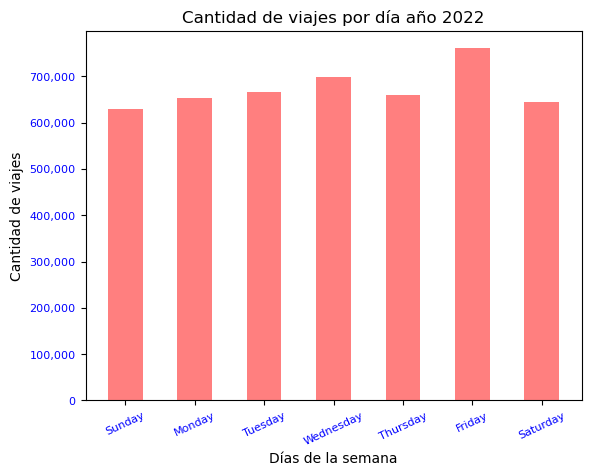

In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


x = summary_day.index.tolist()
y = summary_day['count']
plt.bar(x, y, width=0.5, label='Casual', color='red', alpha=0.5)

plt.xlabel('Días de la semana')
plt.xticks(fontsize=8, color="blue", rotation=25)

plt.yticks(fontsize=8, color="blue")
plt.ylabel('Cantidad de viajes')

# Formato de separación de miles en el eje y
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

plt.title('Cantidad de viajes por día año 2022')
plt.show()

### Gráfico: Porcentajes de viajes por día 

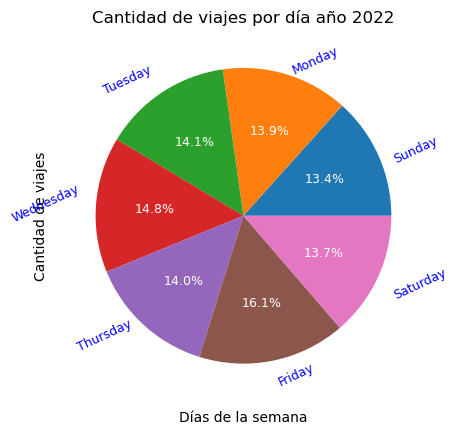

In [34]:
# Piechart

fig = plt.figure()
ax = fig.add_subplot()
__, xtexts, autotexts = ax.pie(y, labels=x, autopct='%1.1f%%')


# Titulos y etiquetas
plt.title('Cantidad de viajes por día año 2022')
plt.xlabel('Días de la semana')
plt.ylabel('Cantidad de viajes')

# Cambia el tamaño y color de %
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(9)

# Cambia el tamaño y color de las etiquetas (días)
for xtext in xtexts:
    xtext.set_color('blue')
    xtext.set_fontsize(9)
    xtext.set_rotation(25)

plt.show()


### Gráfico: Tiempos promedios de viaje año 2022

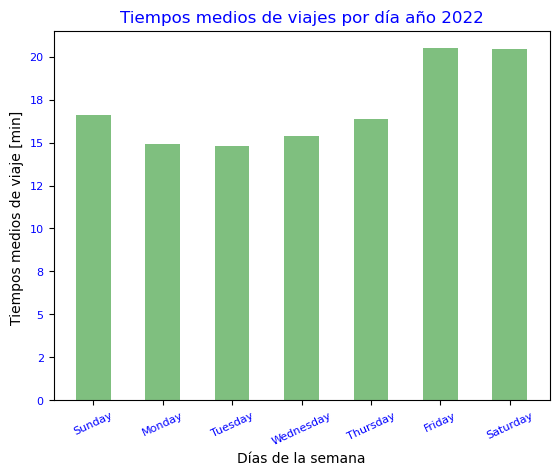

In [35]:
x = summary_day.index.tolist()
y = round(summary_day['mean']/60,2)
plt.bar(x, y, width=0.5, label='Casual', color='green', alpha=0.5)

plt.xlabel('Días de la semana')
plt.xticks(fontsize=8, color="blue", rotation=25)

plt.yticks(fontsize=8, color="blue")
plt.ylabel('Tiempos medios de viaje [min] ')

# Formato de separación de miles en el eje y
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

plt.title('Tiempos medios de viajes por día año 2022', color='blue')
plt.show()

### Gráfico viajes por día y usuarios (Series)
Cantidad de viajes por tipo de usuarios en los días de la semana

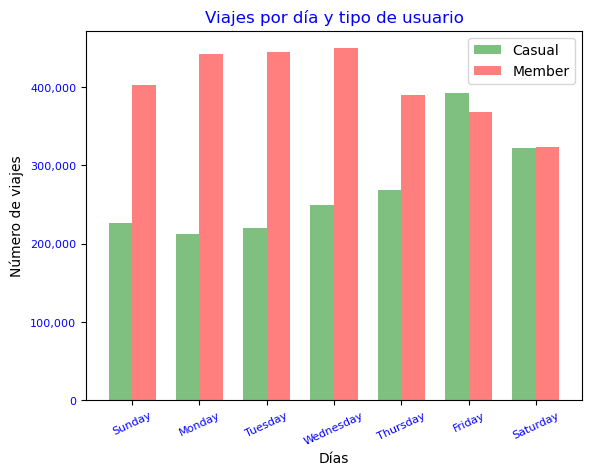

In [36]:
import numpy as np

x = summary_day.index.tolist()

#### SE usa analogía SQL aplicada a Pandas
# SELECT count FROM summay WHERE member_casual = 'member'
y1= summary.loc[summary['member_casual'] == 'casual', 'count']

# SELECT count FROM summay WHERE member_casual = 'member'
y2= summary.loc[summary['member_casual'] == 'member', 'count']

#  Arreglo para las posiciones en el eje x de las barras
posiciones = np.arange(len(y1))
# Ancho de las barras
ancho = 0.35

# Crear las barras para cada serie
plt.bar(posiciones - ancho/2, y1, width=ancho, label='Casual', color="green", alpha=0.5)
plt.bar(posiciones + ancho/2, y2, width=ancho, label='Member', color="red", alpha=0.5)

# Agregar etiquetas en el eje x
plt.xticks(posiciones, x)

# Etiquetas ejes ok
plt.xlabel('Días')
plt.xticks(fontsize=8, color="blue", rotation=25)

plt.ylabel('Número de viajes')
plt.yticks(fontsize=8, color="blue")

plt.title('Viajes por día y tipo de usuario', color='blue')

# Formato de separación de miles en el eje y
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

plt.legend()
plt.show()


### Gráfico: Tiempos de viaje promedio por día y tipo usuarios (Series)
Tiempos medios en minutos.

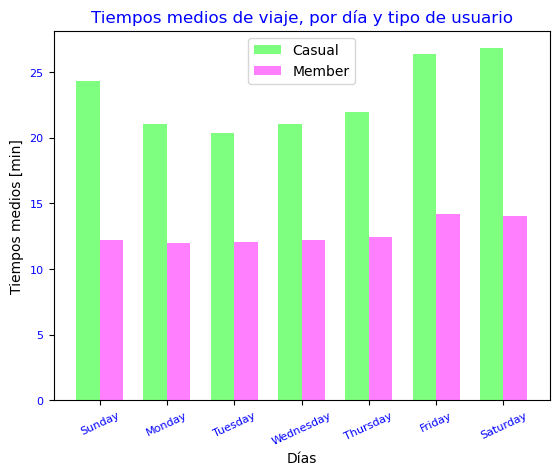

In [37]:
# Tiempos promedios por tipo de usuario
x = summary_day.index.tolist()

#### SE usa analogía SQL aplicada a Pandas
# SELECT count FROM summay WHERE member_casual = 'member'
y1= summary.loc[summary['member_casual'] == 'casual', 'mean']

# SELECT count FROM summay WHERE member_casual = 'member'
y2= summary.loc[summary['member_casual'] == 'member', 'mean']

#  Arreglo para las posiciones en el eje x de las barras
posiciones = np.arange(len(y1))
# Ancho de las barras
ancho = 0.35

# Crear las barras para cada serie
plt.bar(posiciones - ancho/2, y1, width=ancho, label='Casual', color="lime", alpha=0.5)
plt.bar(posiciones + ancho/2, y2, width=ancho, label='Member', color="magenta", alpha=0.5)

# Agregar etiquetas en el eje x
plt.xticks(posiciones, x)

# Etiquetas ejes ok
plt.xlabel('Días')
plt.xticks(fontsize=8, color="blue", rotation=25)

plt.ylabel('Tiempos medios [min]')
plt.yticks(fontsize=8, color="blue")

plt.title('Tiempos medios de viaje, por día y tipo de usuario', color='blue')

# Formato de separación de miles en el eje y
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.gca().yaxis.set_major_formatter(tick)

plt.legend()
plt.show()


## Análisis y principales 'INSIGHTS'

### Cantidad de viajes por día.  

**Casual:**
La cantidad viajes de estos usuarios en los días viernes y sábados, está por encima sobre el resto de los días de la semana.  
Viernes y sábado representa: 20,7% y 17,0% respectivamente.  

**INSIGHT:** Crear promoción campaña con oferta para estos días, incentivando membresía.  


**Member:**  
Estos usuarios hacen uso mayor de viajes los días: lunes, martes y miércoles. Domingo es el día de menor uso.  


### Tiempos de Viaje.  

**Casual:**  
Estos usuarios casi doblan el tiempo de viaje (promedio), de los usuarios que tienen membresía anual.

**INSIGHT:** Esto es un punto importante, ya que se puede apuntar a que el usuario podría ahorrar al obtener una membresía anual. Sus viajes podrían ser más económicos.  


**Ahorro usuario casual:**. 
Sería interesante tener el valor del costo por minuto de viaje de los usuarios casuales.
Con esto se podría contrastar cuanto podrían ahorrar con una membresía anual. Ya que los viajes en tiempo son casi en doble de lo que pasa un usuario con membresía anual.



======================================
#### Exportación de resumen para mas análisis

In [38]:
# Se exporta y guarda como CSV

file_out = os.getcwd() + "/CSV/quarters/Final_summary_dyvvi.csv"

summary.to_csv(file_out)
print("Archivo exportado exitosamente:" + file_out)

Archivo exportado exitosamente:/Users/goyo/workspace/DataScience/Google/8_Proyecto/CSV/quarters/Final_summary_dyvvi.csv


[Ir a compartir](#share-section)


<a id='share-section'></a>

## PARTE 7: Share
Ver enlaces a fuentes externas de reportes.
